In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
df = pd.read_csv("iq", names=["i", "q"])
df

,i,q
0,127,127
1,127,127
2,127,127
3,128,127
4,127,127
...,...,...
2539515,86,113
2539516,92,95
2539517,107,85
2539518,143,67


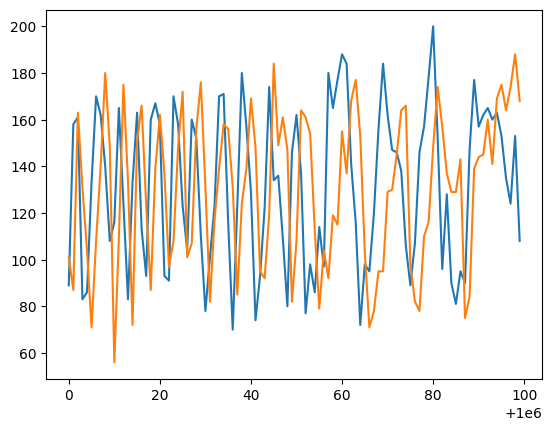

In [6]:
plt.plot(df['i'][1_000_000:1_000_100])
plt.plot(df['q'][1_000_000:1_000_100])
plt.show()

In [7]:
import numpy as np

def fm_demod(x, df=1.0, fc=0.0):
    ''' Perform FM demodulation of complex carrier.

    Args:
        x (array):  FM modulated complex carrier.
        df (float): Normalized frequency deviation [Hz/V].
        fc (float): Normalized carrier frequency.

    Returns:
        Array of real modulating signal.
    '''

    # Remove carrier.
    n = np.arange(len(x))
    rx = x*np.exp(-1j*2*np.pi*fc*n)

    # Extract phase of carrier.
    phi = np.arctan2(np.imag(rx), np.real(rx))

    # Calculate frequency from phase.
    y = np.diff(np.unwrap(phi)/(2*np.pi*df))

    return y

In [9]:
fm_demod(df.to_numpy()) 

ValueError: operands could not be broadcast together with shapes (2539520,2) (2539520,) 